In [13]:
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
port =5439
host = os.getenv('AWS_DB_HOST')
db = os.getenv('AWS_DB')
user = os.getenv('AWS_DB_USER')
password = os.getenv('AWS_DB_PASSWORD')
table_name = os.getenv('AWS_TABLE')

In [15]:
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{db}')
con = engine.connect()
df = pd.read_sql_table(table_name, con)
con.close()

In [80]:
df = pd.read_csv('youtubedata.csv')

In [81]:
df.shape

(23187, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23187 entries, 0 to 23186
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            23187 non-null  object
 1   title         23181 non-null  object
 2   publishedate  23187 non-null  object
 3   views         23187 non-null  int64 
 4   subscribers   23187 non-null  int64 
 5   videos        23187 non-null  int64 
 6   country       23187 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


In [87]:
#convert the data types
df['publishedate'] = pd.to_datetime(df['publishedate'])
df[['videos', 'views', 'subscribers']] = df[['videos', 'views', 'subscribers']].astype(int)

In [83]:
# Retrieving the top 10 channels with the highest view counts
df.nlargest(10, 'views')

,id,title,publishedate,views,subscribers,videos,country
5622,UCQvquVpqgOhuHgl_4MXOm9Q,NDS 07,2023-02-25 02:24:15,1331846788,4020000,164,India
15189,UCu_vsWz8QkdFeQbeD0eRTjA,123 GO! HOUSE,2023-06-13 03:28:13,784351355,1410000,664,United States
5974,UCBnmfqarvFTLAjkW0Q3W2lA,Ha Hack Shorts,2023-05-13 06:54:13,740014193,647000,820,United States
11171,UC5_mjTuvrZpDX34CZvqfQ9Q,Cảnh Sát Trưởng Labrador - Hoạt hình thiếu nhi,2023-03-28 09:06:02,361919686,622000,270,Vietnam
11554,UCHWEA-mYnoJsURGQH-IfWdQ,SR Facto Boi,2023-03-07 20:31:55,351523619,2410000,158,India
434,UCiRxtJ_Ooe2XC_tg5d2Dm3g,Sonu Neha Ji,2023-05-01 18:16:26,299501061,575000,1319,India
19532,UCGrXp5w0eRzF0Bv_-ROtN-g,Bebefinn em Português - Canções Infantis,2023-03-09 09:24:22,289450885,736000,154,Brazil
12397,UCrf9nZeVX69ZmE80_LImagw,SuGaR 슈가,2023-05-11 06:45:07,264265881,575000,241,South Korea
13481,UCL9mIK_rKgR8oB5-jk_aJww,Beep Beep Bus,2023-05-26 17:32:51,260292126,840000,232,United States
11478,UC3Pv6YN9ROebggngrcm1TYQ,Kanika Gunjan,2023-04-15 02:30:25,250912095,496000,1526,India


In [ ]:
# Retrieving the top 10 channels with the highest subscriber counts
df.nlargest(10, 'subscribers')

,id,title,publishedate,views,subscribers,videos,country
5622,UCQvquVpqgOhuHgl_4MXOm9Q,NDS 07,2023-02-25 02:24:15,1331846788,4020000,164,India
19004,UCHdtcjAcmQ5u4gOBG6oD-sA,Ninja Technique Shorts,2023-10-31 14:23:32,51140239,2590000,178,India
11554,UCHWEA-mYnoJsURGQH-IfWdQ,SR Facto Boi,2023-03-07 20:31:55,351523619,2410000,158,India
12936,UCcBc0kafKTdcc5NAGEmA83g,Apni Pathshala,2023-02-11 13:40:16,248099471,1420000,591,India
15189,UCu_vsWz8QkdFeQbeD0eRTjA,123 GO! HOUSE,2023-06-13 03:28:13,784351355,1410000,664,United States
4166,UCqGlUArm1pbHZBFYTbRJUUg,Yash gaming 1000,2023-01-14 06:39:14,42562052,1330000,263,NotSpecified
15065,UCXvcdUbk2p5UeMjxuu6qNlA,PARVEZ 47,2023-03-11 13:01:53,108530361,1080000,323,Bangladesh
1130,UCHZsxZ52e-UtQAvgONbqcaw,Hindi Music Storm HN,2023-06-07 15:19:31,236564211,1060000,1707,India
16602,UCBf9Pq9NyYYAAi-2skPTjCw,Moe's Japan Communications,2023-11-30 04:45:41,5438535,1030000,78,Japan
10196,UCtokcSbYTXFZK5GQDV5tJ0Q,Hindi Music Library_HT,2023-05-10 07:44:41,106211383,972000,2592,India


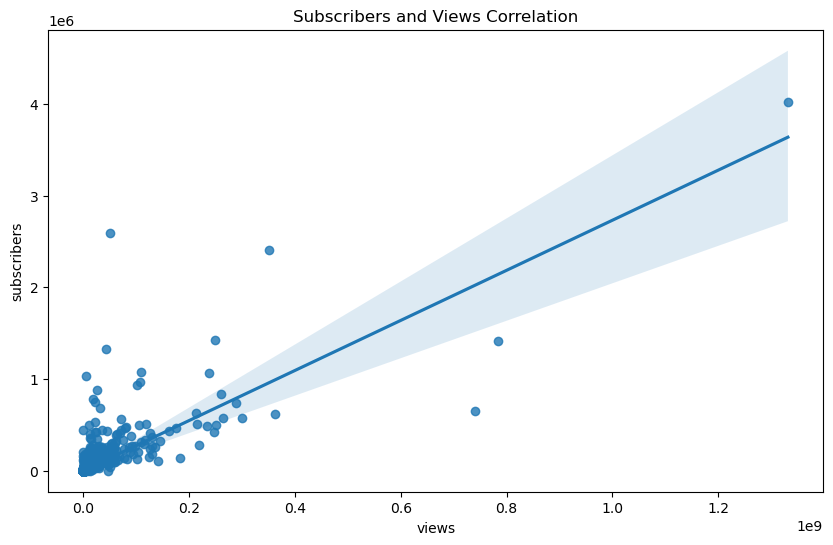

In [84]:
# Simple scatter plot to visualize the correlation between views count and subscribers count
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='views', y='subscribers')
plt.title('Subscribers and Views Correlation')
plt.show()


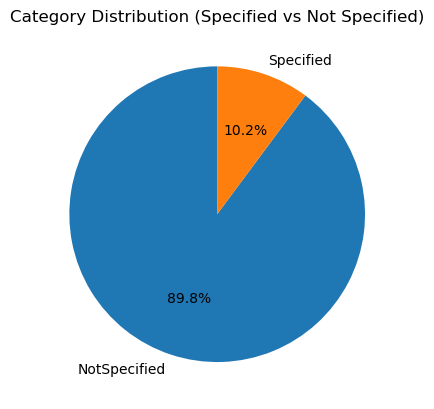

In [85]:
# Simple pie plot to visualize the distribution of channels with specified and unspecified country names
category_counts = df['country'].apply(lambda x: 'NotSpecified' if x == 'NotSpecified' else 'Specified').value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution (Specified vs Not Specified)')
plt.show()

To be eligible for YouTube's Partner Program, a YouTube channel must have a minimum of 1000 subscribers and 4,000 watch hours within the preceding 12 months. Excluding the 12-month criteria, let's analyze the percentage of channels from each month with over 1,000 subscribers and 4,000 watch hours.

In [88]:
# Creating additional columns:
df['month'] = df['publishedate'].dt.month_name()
df['monthnum'] = df['publishedate'].dt.month
df['watch_hours'] = (df['views'] * 30 / 3600).round(2)
df['status'] = np.where((df['subscribers'] > 1000) & (df['watch_hours'] > 4000), 'eligible', 'not eligible')

In [89]:
eligibilitystat = df.groupby(['monthnum','month'])['status'].value_counts(normalize=True).mul(100).round(2).unstack()
eligibilitystat = eligibilitystat.reset_index().rename_axis(index=None, columns=None)
eligibilitystat

,monthnum,month,eligible,not eligible
0,1,January,16.51,83.49
1,2,February,17.44,82.56
2,3,March,12.43,87.57
3,4,April,14.46,85.54
4,5,May,12.43,87.57
5,6,June,12.71,87.29
6,7,July,12.19,87.81
7,8,August,11.83,88.17
8,9,September,10.02,89.98
9,10,October,3.87,96.13


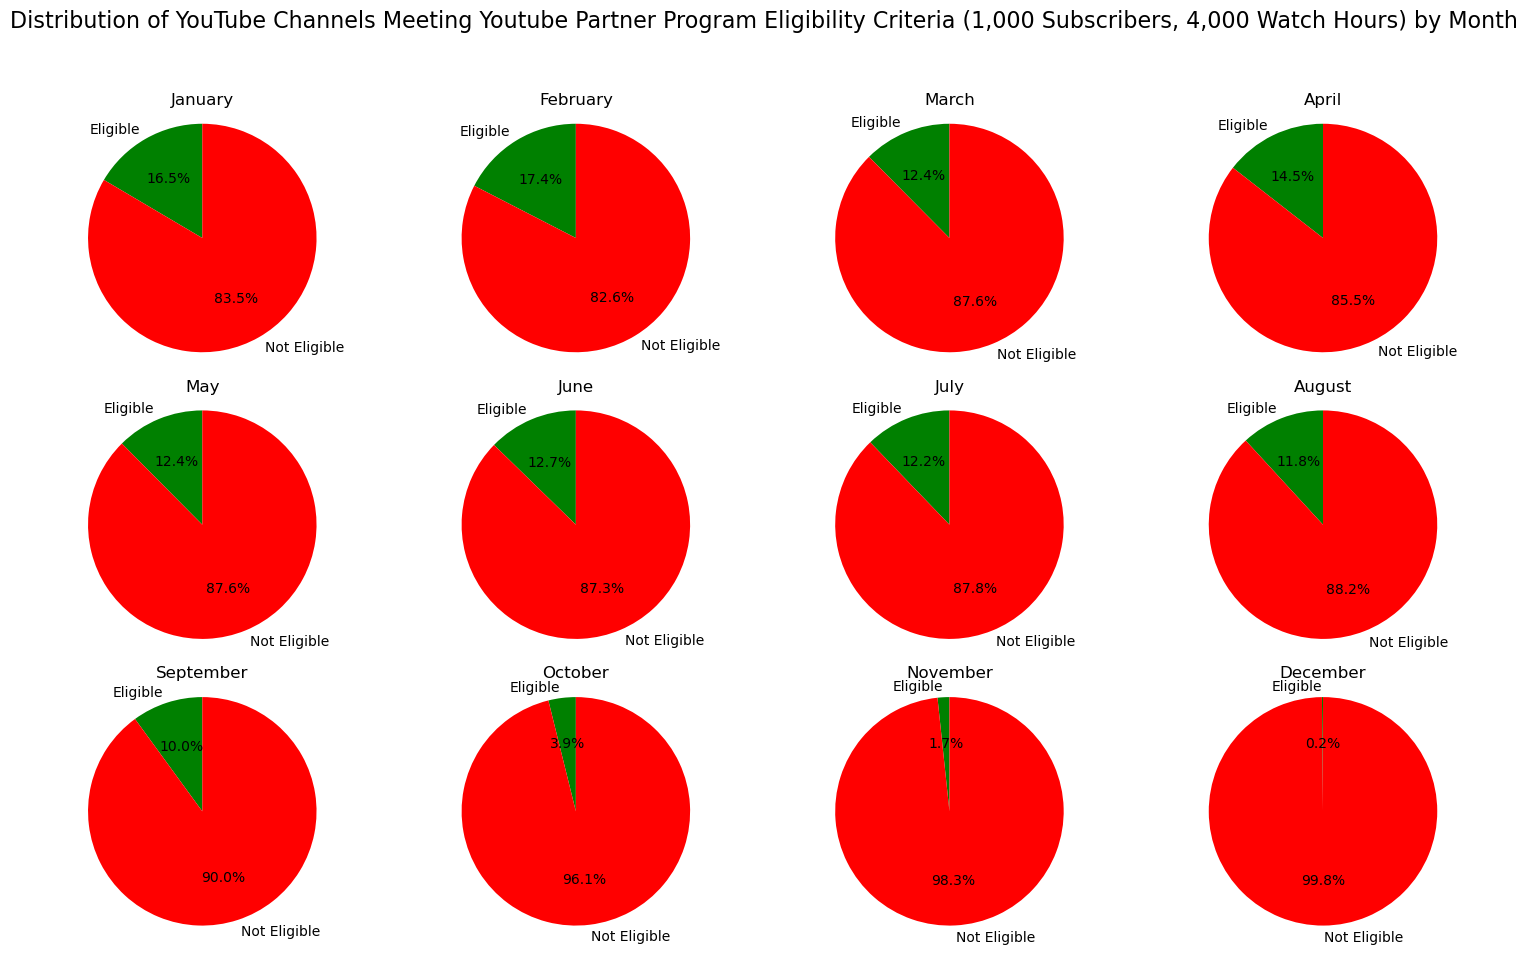

In [90]:
eligibilitystat = eligibilitystat.sort_values(by='monthnum')

months = eligibilitystat['month']
data = eligibilitystat[['eligible', 'not eligible']]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of YouTube Channels Meeting Youtube Partner Program Eligibility Criteria (1,000 Subscribers, 4,000 Watch Hours) by Month', fontsize=16)

for i, (month, ax) in enumerate(zip(months, axes.flatten())):
    values = data.loc[i].tolist()
    labels = ['Eligible', 'Not Eligible']

    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
    ax.axis('equal')  
    ax.set_title(month)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
